***
***
## <font color=red> Changes </font>

* changes highlighted yellow

### Business Understanding
* additional information regarding variables and collection of original data added

### Data Meaning type
* added missing value types int64

### Explore Attributes and Class

* created several classes by age in 10 year increments and further grouped by sex
 * classes grouped as percentile
 * classes grouped as count total
***
***

# Heart Disease - Lab 1
Martin Garcia, Joanna Duran, Daniel Byrne 

In [98]:
#packages
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import HTML

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy import stats
import warnings
warnings.filterwarnings('ignore')


#read the csv file
df = pd.read_csv('heart.csv')

### Business Understanding

The Cleveland Heart Disease Database, CHDD, produced in partnership with the V.A. Medical Center in Long Beach and
Cleveland Clinic Foundation has grown to be a popular repository of heart disease specific measurable attributes.  The [machine learning repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) hosting the dataset boasts 58 paper's citing it.


The CHDD database has been used as the basis of multiple models of various complexity since its creation in 1998.  The original model using logistic regression boasted a 77% accuracy in predicting heart disease.  Subsequent models have pushed that accuracy metric up past 80% and to as high as 89% in one model. 

<mark>The data used to derive the model originated from data collected from 303 consecutive patients slated to receive a coronary angiography at the Cleveland Clinic between May 1981 and September 1984. None of the patients had a prior history or evidence of prior heart attack or known vascular or cardiomyopathic disease. Each patient provided a medical history and underwent a physical examination, provided electrocardiogram at rest, and provided a serum cholesterol fasting blood sugar measurement as part of a routine evaluation. Historical data were recorded and coded without knowledge of the additional test data. The patients also underwent 3 noninvasive tests, an exercise electrocardiogram, a thallium scintigraphy, and a cardiac fluoroscopy.  The results of these tests were not interpreted until after the angiogram was read.</mark>

<mark>The original CHDD dataset contains 76 attributes, but most published experiments, including the original, [International application of a new probability algorithm for the diagnosis of coronary artery disease](https://www.ncbi.nlm.nih.gov/pubmed/2756873), rely only 13 attributes from the dataset. We use data mining techniques to attempt to build a model to that tries to predict coronary artery disease, CAD, in patients from the 13 commonly used attribute from the dataset. </mark> 

<mark>Furthermore, to date, experiments with the Cleveland database have concentrated on simply attempting to distinguish the presence (values 1,2,3,4) from the absence (value 0) for coronary artery disease.  We will attempt to do the same, build a model which is predictive of CAD (1) or not (0); however, with our analysis we also wish to analyze other trends in the data heretofore yet unexplored by prior experimentation.</mark>

<mark>Ideally then, this model then could be used in a clinical setting to classify individuals with a high likelihood of coronary artery disease.  Such a tool could then rule out individuals with fewer symptoms from receiving expensive tests, thus limiting the hospital and doctor's exposure to high risk billings.  It can also limit insurance carriers' and an individuals' exposures to high cost medical liabilities.</mark>

<mark>To date, experiments with the Cleveland database have concentrated on attempting to distinguish the presence (values 1,2,3,4) from the absence (value 0) for coronary artery disease.  We will attempt to do the same, build a model which is predictive of CAD, but at the same time we wish to identify and analyze other trends in the data heretofore yet unexplored that could contribute to a better understanding of the disease.</mark>



### Data Meaning Type

The original CHDD dataset contains 76 attributes, but most published experiments, including the original, rely only 13 attributes from the dataset. A description of the data points used in this model is in Table 1.

<mark>Unfortunately, this dataset is short of the required 30K rows set forth by the advising staff member, Joel Lindsey.</mark>


##### Table 1 - Data Parameter Descriptions
 
| Data     | Description                                        | Attributes / Attribute Type / Scale / Values                                |
|----------|----------------------------------------------------|---------------------------------------------|
| Age      | Age in years                                       | range 29 - 77 / numeric - ratio /  continuous /  int64
                                        | sex      | Gender                                             | Male: 1 Female: 0 / categorical - nominal  / discrete + binary / int64                       |
| cp       | Angina Categories / chest pain type                             | Typical:0, Atypical:1, Non-Anginal:2, Asymptomatic:3 / categorical-ordinal / discrete|/ int64
| trestbps | Resting Blood Pressure (mm Hg - unit of pressure )                             |    range 94- 200 / numeric -  / continuous / int64                                       | 
| chol     | Serum Cholesterol and Triglycerides (mg/dl - milligrams per deciliter)               |     range 126 - 564 / numeric / continuous / int64                                        |
| fbs      | Fasting Blood Sugar > 120 (mg/dl)                        |   True:1 False:0 / discrete + binary / int64                                          |
| restecg  | Resting Electrocardiogram                          |   Normal: 0, Abnormal:1, 2:Probable Ventricular Hypertrophy / thickening heart walls /<mark>int64</mark>                                          |
| thalach  | Maximum Heart Rate                                 |   range 71- 202 /   numeric / continuous / int64                                       |
| exang    | Exercise Induced Angina                            | Yes: 1,  No: 0  / categorical-   / discrete + binary / <mark>int64</mark>                        |
| oldpeak  | ST Depression Induced by Exercise Relative to Rest |   range 0 - 6.2 / numeric / float64                                         |
| slope    | Slope of the Peak Exercise ST Segment              |   Upsloping:10, Flat:1, Downsloping:2    / int64                                       |
| ca       | Number of Major Vessels Colored by Fluoroscopy      | Count with range 0-4 / int64                       |
| thal     | Thalassemia - blood disorder, less hemoglobin and red blood counts                                       |  3: Normal, 6: fixed defect, 7:reversable defect      <mark>int64</mark>                                     |
| target   | Heart Disease Present in Patient                   | Yes: 1,  No: 0   /   discrete+ binary   / int64                      |



### Data Quality

#### MIssing Values

In the 13 variables used in this evaluation, the dataset boasts no missing variables.

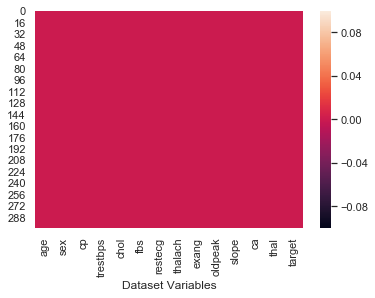

In [71]:
#heatmap for missing values
sns.heatmap(df.isnull());
plt.xlabel("Dataset Variables");

In [72]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Data Descriptions 


<mark>Upon initial overview the dataset seemed very robust since every row has an entry for every attribute. While examining the data there seems to be some discrepancies in the descriptions provided from Kaggle as well as the original data source.
    We investigated the Kaggle discussion boards to see if anybody else had answers. We did find that some of the questions were also asked but no resolution was given. Given that Kaggle was our data source and it gave us no resolution we decided to proceed with the following assumptions. If we found during the data analysis that our assumptions were incorrect, we would reassess and change accordingly.


- <mark>For the category "slope", the provided description "Upsloping:1, Flat:2, Downsloping:3" does not match the data set values of "0,1,2"</mark>.
   - <mark>This is a categorical variable expressed as a integer value, but in the same range (4 values) just shifted to 0.*
   - <mark>We left the dataset as is, and defined our model in the range provided by the dataset. Therefore in the dataset "Upsloping:0 Flat:1 Downsloping:2"
- <mark>For the category "ca", the Kagle description "Count with range 0-3" does not match the data set values of "0-4".
    - <mark>Less than 2% of the data (5/303) records enumerated 4 as the number of vessels Colored by Fluoroscopy.
    - <mark>We left the dataset as is again as the 5 records where ca=5 represent a small subset of the data.  Furthermore, we had no evidence to contridict the data or the provided data description, and so we chose to potentially err on not modifying the dataset.
- <mark>For the category "thal", the provided description "3: Normal, 6: fixed defect, 7: reversable defect" does not match the data set values of "0,1,2,3".
    - <mark>Thal is a label variable on an increasing inteteger scale representing the presence and severity of a particular blood disorder. 
    - <mark>Only one record was 0, as a result we left the single record in the dataset, unmodified as its impact on the analysis tools would be limited and thus this zero value can be ignored in place. Therefore in the dataset "1: Normal, 2: fixed defect, 3: reversable defect".

#### Outlier analysis

We plotted the continuous data points to get an intial sense of the potential outliers in the data.

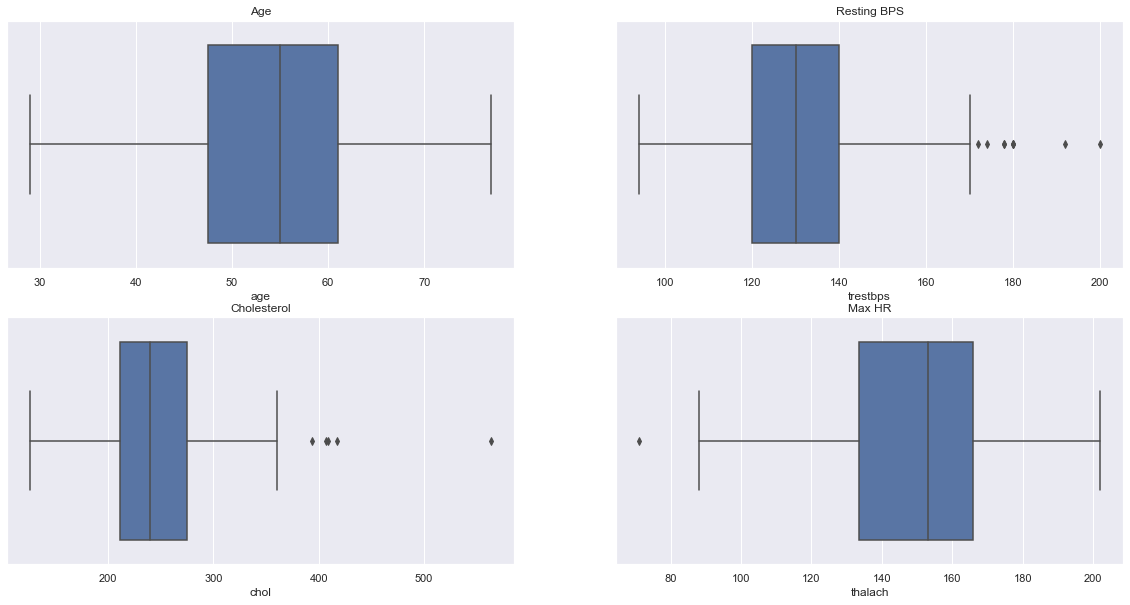

In [73]:
# matplotlib histograms of continuous variables
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["age"])
plt.title('Age')

plt.subplot(2,2,2)
sns.boxplot(x=df["trestbps"])
plt.title('Resting BPS')

plt.subplot(2,2,3)
sns.boxplot(x=df["chol"])
plt.title('Cholesterol')

plt.subplot(2,2,4)
sns.boxplot(x=df["thalach"])
plt.title('Max HR')
plt.show();
    

The Serum Cholesterol and Triglycerides, chol, and Resting BPS, trestbps parameters have slightly left skewed distributions influenced by a small set of outliers on the high end of each variables range. 

The top 4 values of chol are all in the 99%. Thus these 4 values are substantially larger than the 2Q value and thus in this dataset are outliers. These values will pull the mean up, and thus statistical analysis methods tools that use the mean to set confidence intervals and make predictions will be affected by these data points. 

In [74]:

def mypercentile(score):
    return stats.percentileofscore(df,score)


# top 5 chol levels  
df.sort_values(by=['chol'],ascending=False).head(4)[["chol"]]

nearest = np.percentile(df[["chol"]],99,interpolation='nearest')
print('99% Nearest Neighbor Data Point :', str(nearest))



,chol
85,564
28,417
246,409
220,407


99% Nearest Neighbor Data Point : 407


Likewise The top 4 values of trestbps are all in the 99% as well. Thus these 4 values are substantially larger than the 2Q value and thus in this dataset are outliers. These values will pull the mean up, and thus statistical analysis methods tools that use the mean to set confidence intervals and make predictions will be affected by these data points as well. 

In [75]:
# top 5 trestbps levels
df.sort_values(by=['trestbps'],ascending=False).head(4)[["trestbps"]]
nearest = np.percentile(df[["trestbps"]],99,interpolation='nearest')
print('99% Nearest Neighbor Data Point :', str(nearest))


,trestbps
223,200
248,192
266,180
110,180


99% Nearest Neighbor Data Point : 180


### Simple Statistics

The summary statistics of the continuous variables show that the average and the median age of each distribution are relatively close which is an indication of a tight variance.  They also all seem to be relatively normally distributed.  These characteristics opens them up for traditional statistical analysis methodologies.


In [76]:
#Summary statistics for all observations/patients
stats = df.describe()
contstats = stats[["age","trestbps","chol","thalach"]];
contstats

,age,trestbps,chol,thalach
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


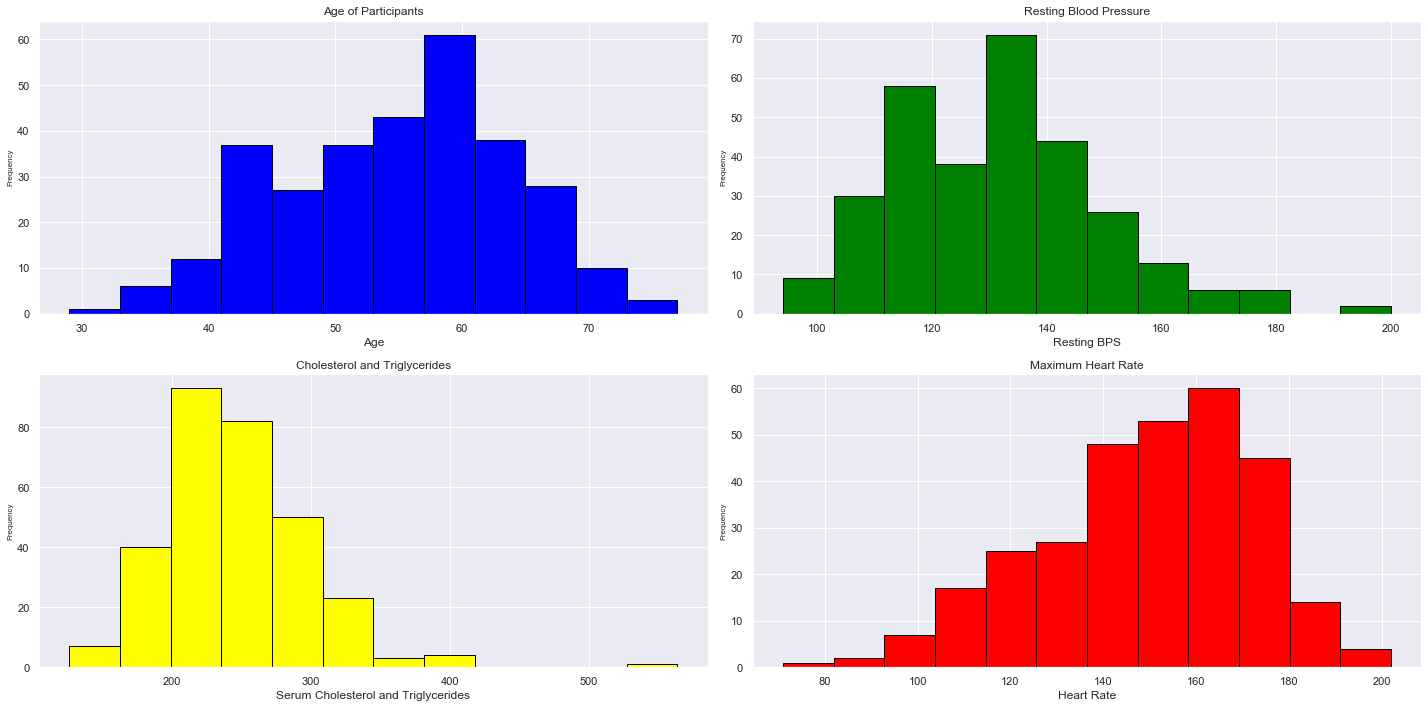

In [77]:
# matplotlib histograms of continuous variables
plt.figure(figsize=(20,10))
for i in range(0, 4):
    
    
    # Set up the boxes
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the histograms
    if i == 0:
        ax.hist(df['age'], bins = int(180/15),color = 'blue', edgecolor = 'black');
        ax.set_title('Age of Participants', size = 12)
        ax.set_xlabel('Age')
    
    if i == 1:
        ax.hist(df['trestbps'], bins = int(180/15),color = 'green', edgecolor = 'black');
        ax.set_title('Resting Blood Pressure', size = 12)
        ax.set_xlabel('Resting BPS')
    
    if i == 2:
        ax.hist(df['chol'], bins = int(180/15),color = 'yellow', edgecolor = 'black');
        ax.set_title('Cholesterol and Triglycerides', size = 12)
        ax.set_xlabel('Serum Cholesterol and Triglycerides')
        
        
    if i == 3:
        ax.hist(df['thalach'], bins = int(180/15),color = 'red', edgecolor = 'black');
        ax.set_title('Maximum Heart Rate', size = 12)
        ax.set_xlabel('Heart Rate')

    # Set the common y axis label
    ax.set_ylabel('Frequency', size= 8)

plt.tight_layout();
plt.show();

### CAD Target Analysis

There are more patients with the presence of heart disease (165) versus no presence of heart disease (138), but this is still a well distributed data set. However, the data does not represeent a random sample considering study participants were chosen from a group of patients reffered for coronary angiography. The assumption being that if a petient is referred for this procedure there is at least a concern that the patient referred could be at risk for CAD. Therefore, this study cannot be generalized to a wider population.

target
0    138
1    165
Name: target, dtype: int64


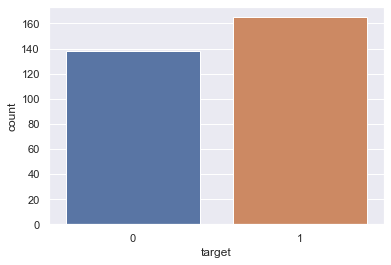

In [78]:
# Aggregate by CAD, presence:1 = yes 0 = no
df_grouped = df.groupby(by='target')
print (df_grouped.target.count())
sns.countplot(x='target',data=df);

**Pearson Correlaion Coeficient Matrix**

In [79]:
# CHDD Correlation matrix
corrm = df.corr()
display(corrm)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


The chart below is the Pearson's Correlation Coeficient matrix graphed on a gradient. Purple is higher negative correlation, and green is the higher positive correlation.     

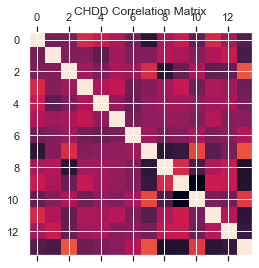

In [80]:
plt.matshow(corrm);
plt.title("CHDD Correlation Matrix");

The correlation matrix gives us hints as wto which factors are correlated with CAD.  In particular is evident that Exercise Induced Angina and Maximum HR are strongly correlated with the presence of CAD; whereas Cholesterol and Fasting Blood Sugar are not strongly correlated with CAD.

#### Gender Analysis

We grouped the dataset by gender to see if there were any gender specific trends in the data.

target  sex
0       0       24
        1      114
1       0       72
        1       93
Name: target, dtype: int64


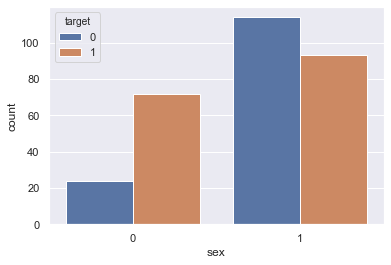

In [81]:
#grouped further by sex, 1 = male, 0 = female

df_grouped = df.groupby(['target','sex'])
print (df_grouped.target.count());

#print (df_grouped.target.count())
sns.countplot(x='sex',hue='target',data=df);

When grouped by gender and the presence of CAD.  

- In the group of patients that do show CAD (target 1), the distribution is 93 males  to 72 females, 1.3:1. 
- In the group that does not show CAD (target 0), the 114 males, 24 females without the disease. , 4.75:1

Since the source population for both groups is the same, this discrepancy alludes to a possible underlying factor which drives physician's to order a coronary angiography for males when at a higher rate than females event when the ultimate prognosis shows that the patient did meet the criteria for a CAD diagnosis. 

In [82]:
groupdes = df_grouped.describe()
groupdes

age                                                        \
            count       mean        std   min    25%   50%    75%   max   
target sex                                                                
0      0     24.0  59.041667   4.964913  43.0  56.75  60.5  62.00  66.0   
       1    114.0  56.087719   8.385155  35.0  51.00  57.5  61.00  77.0   
1      0     72.0  54.555556  10.265337  34.0  46.00  54.0  63.25  76.0   
       1     93.0  50.903226   8.682897  29.0  44.00  52.0  57.00  70.0   

               cp            ...   ca        thal                           \
            count      mean  ...  75%  max  count      mean       std  min   
target sex                   ...                                             
0      0     24.0  0.166667  ...  2.0  3.0   24.0  2.500000  0.589768  1.0   
       1    114.0  0.543860  ...  2.0  4.0  114.0  2.552632  0.705128  0.0   
1      0     72.0  1.333333  ...  0.0  2.0   72.0  2.000000  0.290701  0.0   
       1     93.0  1.408602  ...  0.0  4.0   93.0  2.215054  0.548703  1.0   

                                
            25%  50%  75%  max  
target sex                      
0      0    2.0  3.0  3.0  3.0  
       1    2.0  3.0  3.0  3.0  
1      0    2.0  2.0  2.0  3.0  
       1    2.0  2.0  3.0  3.0  

[4 rows x 96 columns]

The average age of those diagnosed with CAD also varied by gender.

- 54 for females  
- 50 for males 

Females referred for coronary angiography without CAD have an average age of 59, which is higher than males at 56.  However, the disparity in group sample size skews the mean comparison.  Liekwise for female patients diagnosed with CAD, their average age was higher than males, 54,50.  

#### Resting Blood Pressure

We noted that the trestbps (resting blood pressure) is higher for people without heart disease which seems to be contradictory. 

The Cleveland Clinic (https://health.clevelandclinic.org/6-myths-blood-pressure-heart-rate/) defines Optimal blood pressure as 120 mm Hg systolic — which is the pressure as your heart beats — over 80 mm Hg diastolic — which is the pressure as your heart relaxes." 

Since our data only gives one number as opposed to the standard format of systolic over diastolic, we will assume that it is the systolic pressure. Given that assumption, all means of the target and non-target groups are in the above normal level.  The correlation matrix also showed a weak correlation with resting BPs. 

The dataset indicates that female study participants without CAD had the highest BPS average, but this is ikely due to the fact that the highest trestbps for the entire data set belongs to a woman in that category. Since that group is so small, this outlying datapoint has skewed the mean higher.  The median of this group probably give a better estimation of the true mean. The median for this group is 140 which is only a little lower than the average and it is 10 points higher than all the other medians so this is a trend that we need to further investigate.

#### Maximum Heart Rate

In looking at thalach (maximum heart rate), there seems to be a very wide spread. According to the Mayo Clinic (https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979) heart rate is influenced by MANY factors such as: age, fitness and activity levels, smoker status, having cardiovascular disease, high cholesterol or diabetes, air temperature, body position (standing up or lying down, for example), emotions, body size, and medications. The article also explains the wide spread we observe; "Although there's a wide range of normal, an unusually high or low heart rate may indicate an underlying problem. Consult your doctor if your resting heart rate is consistently above 100 beats a minute (tachycardia) or if you're not a trained athlete and your resting heart rate is below 60 beats a minute (bradycardia)" According to the American heart association (https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates), for people age 50-54 (which is our average age) the Target HR Zone is 83-140 bpm and Average Maximum Heart Rate is 170 bpm. There are a few data points that are above 170 and a considerable amount that are over the 140 bpm.

### Visualize Attibutes

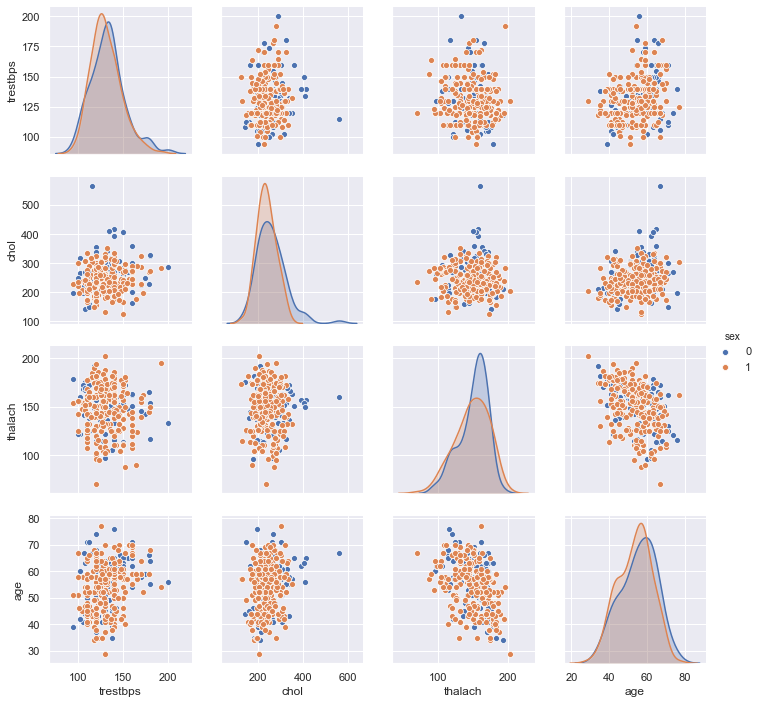

In [83]:
g = sns.pairplot(df, vars=["trestbps", "chol","thalach","age"], hue="sex")

<mark>A pair plot of the continuous variables reflects the normal distribution and nearly normalized variance across both sexes.  The chol plot does show that at least one value, 564, could be highly influential in a model considering it outlying position relative to the majority of other chol data points.</mark>

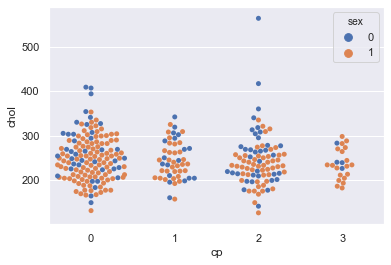

In [85]:
 ax = sns.swarmplot(y="chol", x="cp", hue="sex",data=df)

<mark>The swarm plot above again illustrates the realtion between chest pain catgegories and cholesterol levels.  Interestingly enough the 564 cholesterol oultier datapoint was for a male patient reporting no chest pain.</mark>

### <mark>Explore Joint Attributes and Class</mark>

<mark>Grouping the data by sex class, age groups, and response we can see various differences in our Cleveland dataset.</mark>

In [86]:

#create new age classes
df['age_range'] = pd.cut(df.age,[0,29,39,49,59,69,79],6,labels=['20s','30s','40s', '50s','60s','70+']) 
df.age_range.describe()

#find percentage of patients with evidence of heart disease per age group and sex
df_gr = df.groupby(by=['age_range', 'sex'])
print ("Percentage of heart disease in each subset age group")
print (df_gr.target.sum() / df_gr.target.count() *100)


count     303
unique      6
top       50s
freq      125
Name: age_range, dtype: object

Percentage of heart disease in each subset age group
age_range  sex
20s        1      100.000000
30s        0      100.000000
           1       60.000000
40s        0       94.736842
           1       60.377358
50s        0       70.588235
           1       45.054945
60s        0       60.606061
           1       25.531915
70+        0      100.000000
           1       20.000000
Name: target, dtype: float64


<mark>The horizontal box plot shows us that a higher percentage of women had a response value of 1 for presense of heart disease. This however only presents one side of the picture as all are measured against 1 and not proportional to actual amount of patients categorized by gender or age group. </mark>

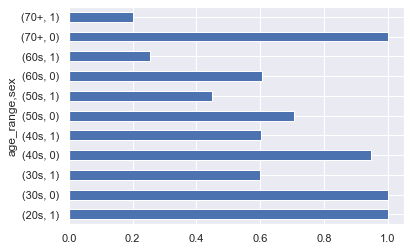

In [87]:
target = df_gr.target.sum() / df_gr.target.count()
ax = target.plot(kind='barh')

<mark>Looking at a proportion per total a larger count of males from our Cleveland sample had heart disease.</mark>

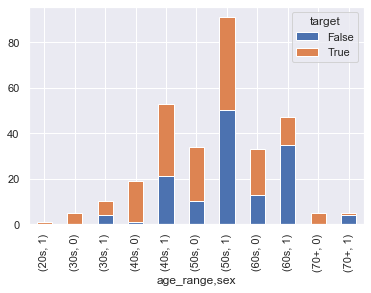

In [88]:
#we can see proportion per actual counts
hd = pd.crosstab([df['age_range'],df['sex']], df.target.astype(bool))
hd.plot(kind='bar', stacked=True);


We plotted the parameters with the highest absolute correlation, grouped by sex to the Target and fit a linear model to these relationships to get a sense of their individual contributions to the response.

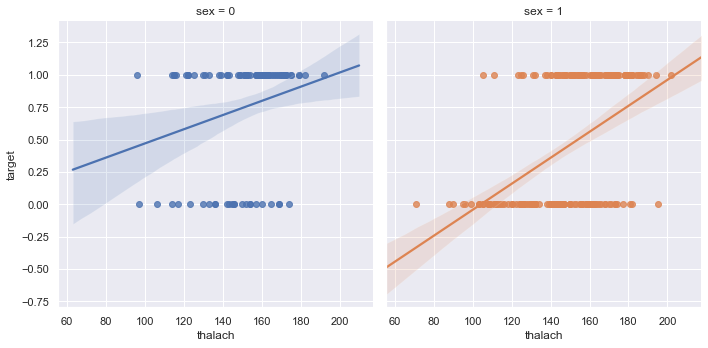

In [89]:
sns.lmplot(x="thalach", y="target", hue="sex", fit_reg=True, col="sex",data=df)
plt.show();

<mark>Plotting the linear regression and confidence intervals of Maximum Heart Rate as it relates to the presence of CAD and sex reveals Maximum Heart Rate to be indicitive of CAD as heart rate increases. Also males, plotted in green, can have a much high hart rate before beginning to show signs of CAD than women, but show geater strides towards the disease as heart rate increases.</mark>

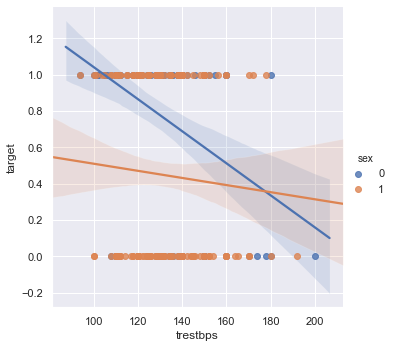

In [90]:
sns.lmplot(x="trestbps", y="target" ,hue="sex",data=df)
plt.show();

<mark>Plotting the linear regression and confidence intervals of Resting Heart Rate as it relates to the presence of CAD and sex reveals Resting Heart Rate to be inversely predictive of CAD as heart rate increases. Males showed a roughly +/-20% negative correlation, but females with low Resting Heart Rates were highly predictive of CAD.</mark>

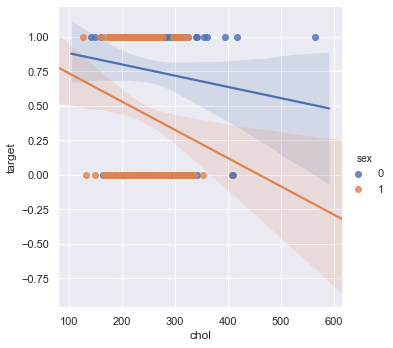

In [91]:
sns.lmplot(x="chol", y="target" ,hue="sex",data=df)
plt.show();

<mark>The following plot reveals the affect of removing the cholesterol outlier from the dataset.</mark>

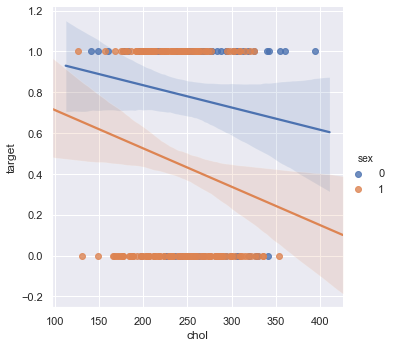

In [99]:
dfnooutlier = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
sns.lmplot(x="chol", y="target", hue="sex" ,data=dfnooutlier)
plt.show();

<mark>Removing the outlier levels off the slopes and narrows the confidence intervals. However, the data still shows a negative correlation between CAD and cholesterol level for both males and females which is counter intuitive.  Furthermore, it bucks the correlation shown between high cholesterol levels and CAD from numerous studies.  This negative correlation can possibly be a result of the total cholesterol measurement data in this dataset which combines the count of HDL and LDL cholesterol into a single number.  Low levels of high density lipoprotein (HDL) cholesterol are as much a risk factor for CAD as high LDL [cholesterol](https://europepmc.org/abstract/med/3179802).  So the combining of these two numbers in a small dataset such as this one could conflate the two metrics.</mark>

### <mark>Explore Joint Attributes</mark>

In [ ]:

#pull continuous numeric data
continuous_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak', 'target']

#changing to type float
df[continuous_features] = df[continuous_features].astype(np.float64)

#matrix for continuous numeric data broken by heart disease presense, 1= yes 0=no
sns.set(style="ticks")
grid = sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach','oldpeak'], hue="target")
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds');

When our data is broken into two groups, consisting of those with evidence of CAD and without we see overlapping in attributes and also see noticeable differences. The matrix above contains the continuous variables from our original 13 explanatory variables, we see three different graphs including a correlation plot, density curve and bivariate density. 

The distributions show a steeper curve for those with heart disease. This applies to variables old peak and thalach. This translates to those with heart disease have a reversable blood disorder. 

Those with heart disease reflect an age distribution at age 60, in contrast the other group centers are age 75. Our matrix utilizing a distribution and correlation plot did no show major differences between male and females.


In [ ]:
#matrix broken down by gender, 1=male 0=female

sex = sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach','oldpeak'], hue="sex", palette="husl")
for i, j in zip(*np.triu_indices_from(sex.axes, 1)):
    sex.axes[i, j].set_visible(False)

We breakdown the data by gender to see if there are noticeable differences between males and females. While not much differences in age and trestbps, there are substantial differences in chol and thalach. Here we see that the high cholesterol point of 564 belongs to a female as well as 4 other high points belong to females. But even with those high values, overall females still have lower cholesterol levels than males. The thalach seems to be substantially higher for females than males. There also seems to be a negative correlation between thalach and age.

### New Features

The data set used is originally from the UCI machine learning repository. The kaggle version, which we used,  is a simplified data set with reduced explanatory and response variables. The original repository has four different levels for our response, and not limited to heart disease presence only, or a simple discrete binary value. Adding additional response measure, we can get a better picture of what contributes to the heart disease at different levels. 


### Exceptional Work

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        51
           1       0.78      0.88      0.82        40

   micro avg       0.84      0.84      0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91

[[41 10]
 [ 5 35]]


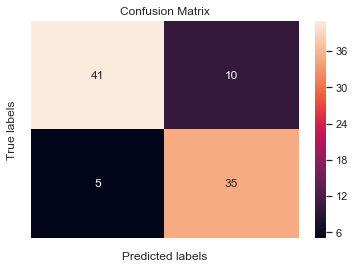

In [100]:

#splitting data into test and training sets, 30-70 split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], train_size=.7,test_size=0.30, 
                                                    )
#train and predict
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

#results

print(classification_report(y_test,predictions))

#confusion matrix
CM = confusion_matrix(y_test, predictions)
print(CM)

ax= plt.subplot()
sns.heatmap(CM, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([]); ax.yaxis.set_ticklabels([]);



Our response is binary implying a logistic regression model to help us predict whether a patient has heart disease given the 13 explanatory variables. We used 70-30 split for our training and test sets respectively. The results are different when predicting those without and with heart disease. Our accuracy is higher for predicting patients without heart disease at the high 80% range, ranging from 85-90%. Predicting heart disease however is lower range of 80s, ranging from 79 to 85% during testing of several iterations.